Iris数据集共有**150**个样本，包含**4**个特征，分别是花萼长度(`SepalLengthCm`)、花萼宽度(`SepalWidthCm`)、花瓣长度(`PetalLengthCm`)、花瓣宽度(`PetalWidthCm`)。  
目标类别共有**3**类，分别是`setosa`, `versicolor`, `virginica`。


In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import  pyplot as plt
plt.style.use('seaborn')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report



<h2>1.首先读取数据文件，查看数据统计信息</h2>


In [6]:
iris_path='./iris.csv'
iris=pd.read_csv(iris_path,usecols=[1,2,3,4,5])
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>绘制多种图像，观察数据特征与对应类别之间的关系。这里使用violin图和箱型图，前者显示核密度分布，后者显示真实数据点分布。</h3>


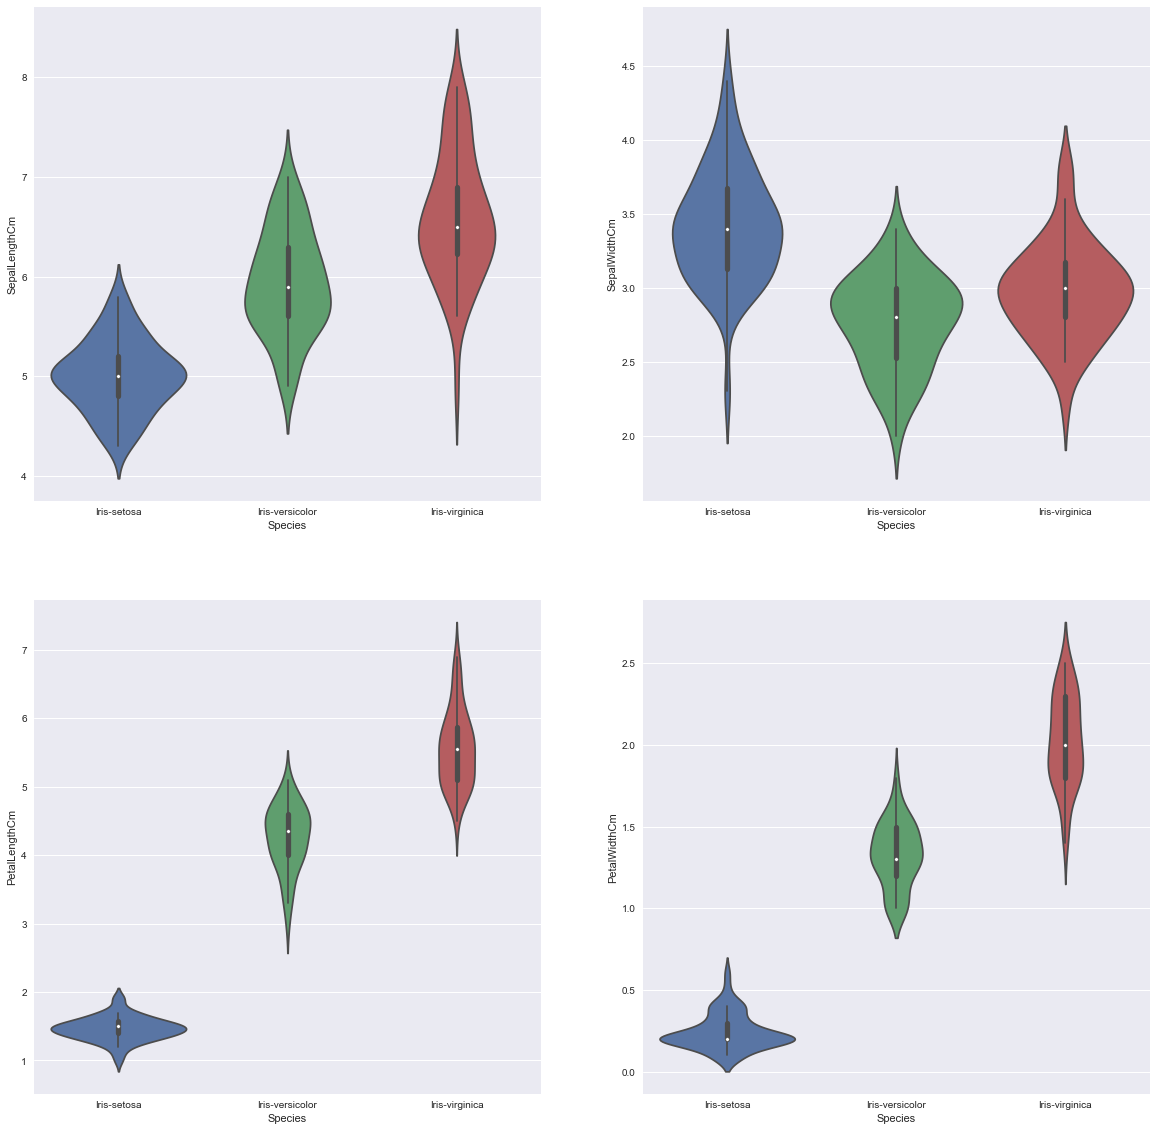

In [8]:
%matplotlib inline
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.despine(left=True)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris,ax=axes[0,0])
sns.violinplot(x='Species',y='SepalWidthCm',data=iris,ax=axes[0,1])
sns.violinplot(x='Species',y='PetalLengthCm',data=iris,ax=axes[1,0])
sns.violinplot(x='Species',y='PetalWidthCm',data=iris,ax=axes[1,1])
plt.show()

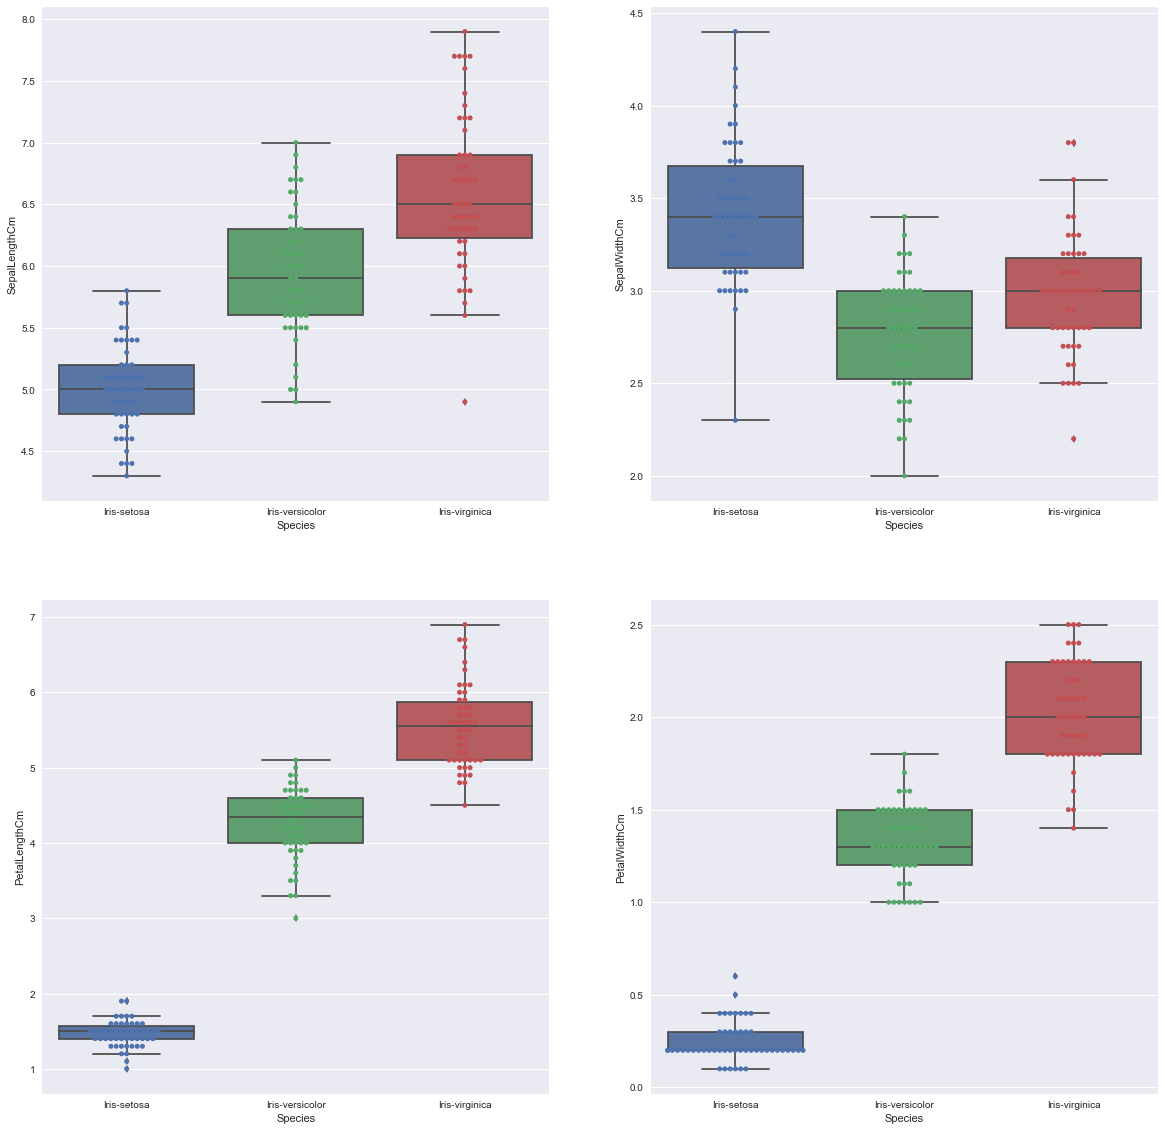

In [9]:
%matplotlib inline
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.despine(left=True)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris,ax=axes[0,0])
sns.swarmplot(x='Species',y='SepalLengthCm',data=iris,ax=axes[0,0])
sns.boxplot(x='Species',y='SepalWidthCm',data=iris,ax=axes[0,1])
sns.swarmplot(x='Species',y='SepalWidthCm',data=iris,ax=axes[0,1])
sns.boxplot(x='Species',y='PetalLengthCm',data=iris,ax=axes[1,0])
sns.swarmplot(x='Species',y='PetalLengthCm',data=iris,ax=axes[1,0])
sns.boxplot(x='Species',y='PetalWidthCm',data=iris,ax=axes[1,1])
sns.swarmplot(x='Species',y='PetalWidthCm',data=iris,ax=axes[1,1])
plt.show()


<h3>绘制多种特征双变量关系图，对角线显示kde图。在绘制热力图，查看特征相关性</h3>

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

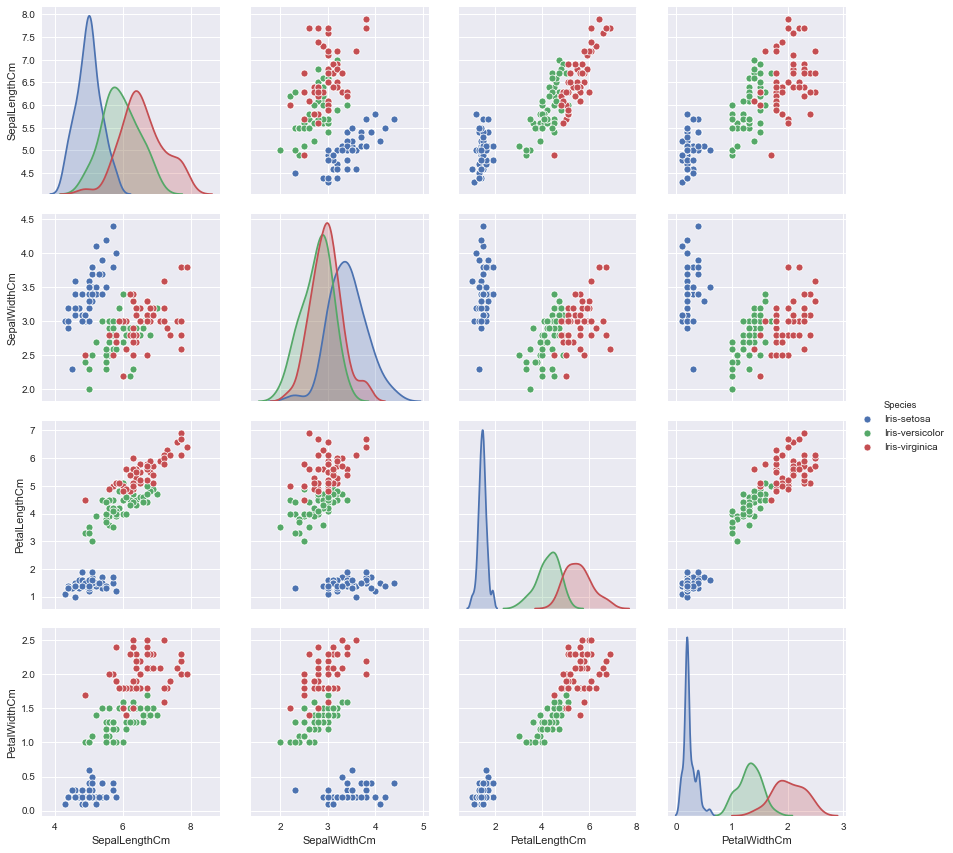

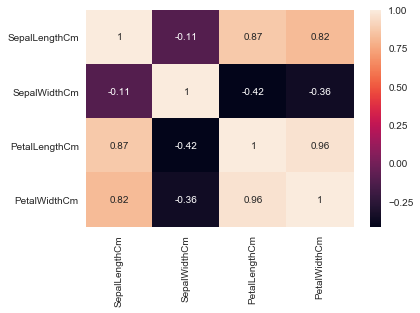

In [10]:
%matplotlib inline
fig=plt.figure()
sns.pairplot(data=iris,hue='Species',size=3,diag_kind='kde')
plt.show()

fig=plt.figure()
sns.heatmap(data=iris.corr(),annot=True)
plt.show()

### 参考上面各图，发现根据其数据特征进行分类的分类界限十分明显，故分类难度不大，接近于线性分类。  

<h2>2.数据预处理，划分数据集</h2>

In [11]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

encoder=LabelEncoder()
y=encoder.fit_transform(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=78)
print(x_train.shape)
print(y_train.shape)


(105, 4)
(105,)


<h2>3.分别使用支持向量机与逻辑回归模型进行训练测试，并打印测试准确率与评估报告</h2>

In [12]:
model1=SVC()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
print('svm model accuracy:{:.4f}'.format(accuracy_score(y_test,pred)))
print('svm model report:',classification_report(y_test,pred,target_names= ['setosa', 'versicolor', 'virginica']))

model2=LogisticRegression()
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
print('lr model accuracy:{:.4f}'.format(accuracy_score(y_test,pred)))
print('lr model report:',classification_report(y_test,pred,target_names= ['setosa', 'versicolor', 'virginica']))


svm model accuracy:0.9778
svm model report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

lr model accuracy:0.9333
lr model report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.84      0.91        19
   virginica       0.83      1.00      0.91        15

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
